## text pre-processing with NLTK

In this notebook, you will learn: 

* Tokenization of paragraphs/sentences
* Stemming the words
* Lemmatization
* stopwords
* how to create Bag-Of-Words 
* Word2Vec
* make wordcloud 

In [3]:
## Packages that you need 

!pip install wordcloud
!pip install gensim

     |███▌                            | 2.6 MB 12.5 MB/s eta 0:00:02

     |█████████▏                      | 6.8 MB 12.5 MB/s eta 0:00:02

     |██████████████▉                 | 11.1 MB 12.5 MB/s eta 0:00:02

     |████████████████████▌           | 15.3 MB 12.5 MB/s eta 0:00:01

     |██████████████████████████▏     | 19.5 MB 12.5 MB/s eta 0:00:01

     |████████████████████████████████| 23.8 MB 12.5 MB/s eta 0:00:01

     |████████████████████████████████| 23.9 MB 12.5 MB/s eta 0:00:01

     |████████████████████████████████| 23.9 MB 12.5 MB/s 


     |████████████████████████████████| 57 kB 8.1 MB/s 


In [4]:
import re

import heapq

import numpy as np

from wordcloud import WordCloud # plot wordcould
from gensim.models import Word2Vec  # word2vec
import matplotlib.pyplot as plt  # plot 

import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

/projects/ae15c660-30de-474e-abca-5963358c9eb9/.local/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[nltk_data] Downloading package wordnet to /projects/ae15c660-30de-474
[nltk_data]     e-abca-5963358c9eb9/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


[nltk_data] Downloading package punkt to /projects/ae15c660-30de-474e-
[nltk_data]     abca-5963358c9eb9/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[nltk_data] Downloading package averaged_perceptron_tagger to /project
[nltk_data]     s/ae15c660-30de-474e-abca-5963358c9eb9/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [5]:
paragraph = """Thank you all so very much. Thank you to the Academy. 
               Thank you to all of you in this room. I have to congratulate 
               the other incredible nominees this year."""

##### Tokenization of paragraphs/sentences

In [6]:
# Tokenizing sentences
sentences = nltk.sent_tokenize(paragraph) #tokenizing or splitting a string, text into a list of sentences.
print(sentences)

['Thank you all so very much.', 'Thank you to the Academy.', 'Thank you to all of you in this room.', 'I have to congratulate \n               the other incredible nominees this year.']


In [7]:
# Tokenizing words
words = nltk.word_tokenize(paragraph) #tokenizing or splitting a string, text into a list of words.
print(words)

['Thank', 'you', 'all', 'so', 'very', 'much', '.', 'Thank', 'you', 'to', 'the', 'Academy', '.', 'Thank', 'you', 'to', 'all', 'of', 'you', 'in', 'this', 'room', '.', 'I', 'have', 'to', 'congratulate', 'the', 'other', 'incredible', 'nominees', 'this', 'year', '.']


In [8]:
# test word_tokenize on eg.
print(nltk.word_tokenize('My dog is crazy, eg. he bites all the time.'))

['My', 'dog', 'is', 'crazy', ',', 'eg', '.', 'he', 'bites', 'all', 'the', 'time', '.']


In [9]:
# test sent_tokenize
print(nltk.sent_tokenize('My dog is crazy, eg. he bites all the time.'))

['My dog is crazy, eg.', 'he bites all the time.']


In [10]:
# test abbreviation with period 
print(nltk.sent_tokenize('I am learning N.L.P. at ai-camp. And I like N.L.P..'))

['I am learning N.L.P.', 'at ai-camp.', 'And I like N.L.P..']


In [11]:
# test abbreviation with period 
print(nltk.word_tokenize('I am learning N.L.P. at ai-camp. And I like N.L.P..'))

['I', 'am', 'learning', 'N.L.P', '.', 'at', 'ai-camp', '.', 'And', 'I', 'like', 'N.L.P', '..']


##### Stemming the words -- reducing inflected (or sometimes derived) words to their word stem, base or root form

In [12]:
import nltk
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [13]:
stemmer.stem('troubled')

'troubl'

In [14]:
stemmer.stem('trouble')

'troubl'

In [15]:
stemmer.stem('troubling')

'troubl'

In [16]:
stemmer.stem('troubles')

'troubl'

In [17]:
stemmer.stem('working')

'work'

In [18]:
stemmer.stem('worked')

'work'

In [19]:
stemmer.stem('works')

'work'

In [20]:
stemmer.stem('work')

'work'

In [21]:
stemmer.stem('try')

'tri'

In [22]:
stemmer.stem('trying')

'tri'

In [23]:
stemmer.stem('tried')

'tri'

##### Lemmatization considers the context and converts the word to its meaningful base form

In [24]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [25]:
lemmatizer.lemmatize('troubles')

'trouble'

In [26]:
lemmatizer.lemmatize('troubled')

'troubled'

In [27]:
lemmatizer.lemmatize('troubling')

'troubling'

In [28]:
lemmatizer.lemmatize('trouble')

'trouble'

##### Stopwords

In [29]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /projects/ae15c660-30de-4
[nltk_data]     74e-abca-5963358c9eb9/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [31]:
print(stopwords.words('french'))

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [32]:
# Removing stopwords in the example above
sentences = nltk.sent_tokenize(paragraph)  
print(sentences)

['Thank you all so very much.', 'Thank you to the Academy.', 'Thank you to all of you in this room.', 'I have to congratulate \n               the other incredible nominees this year.']


In [33]:
# remove all the stopwords
for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])
    words = [word for word in words if word not in stopwords.words('english')]
    sentences[i] = ' '.join(words)               
print(sentences) #eliminating all stop words

['Thank much .', 'Thank Academy .', 'Thank room .', 'I congratulate incredible nominees year .']


##### Create Bag-Of-Words 

In [34]:
# Tokenize sentences
dataset = nltk.sent_tokenize(paragraph)
print(dataset)

['Thank you all so very much.', 'Thank you to the Academy.', 'Thank you to all of you in this room.', 'I have to congratulate \n               the other incredible nominees this year.']


In [35]:
for i in range(len(dataset)):
    dataset[i] = dataset[i].lower()            # lower case 
    dataset[i] = re.sub(r'\W',' ',dataset[i])  # eliminating character not from a-z, A-Z, 0-9 and _ 
    dataset[i] = re.sub(r'\s+',' ',dataset[i]) # eliminating one or more whitespace characters

In [36]:
print(dataset)

['thank you all so very much ', 'thank you to the academy ', 'thank you to all of you in this room ', 'i have to congratulate the other incredible nominees this year ']


In [37]:
# Creating word histogram
word2count = {}
for data in dataset:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1
print (word2count) #frequencies of words in the document

{'thank': 3, 'you': 4, 'all': 2, 'so': 1, 'very': 1, 'much': 1, 'to': 3, 'the': 2, 'academy': 1, 'of': 1, 'in': 1, 'this': 2, 'room': 1, 'i': 1, 'have': 1, 'congratulate': 1, 'other': 1, 'incredible': 1, 'nominees': 1, 'year': 1}


In [38]:
##### Selecting best 5 features
freq_words = heapq.nlargest(5,word2count,key=word2count.get)
print(freq_words)

['you', 'thank', 'to', 'all', 'the']


In [39]:
# Converting sentences to vectors
X = []
for data in dataset:
    vector = []
    for word in freq_words:
        if word in nltk.word_tokenize(data):
            vector.append(1)
        else:
            vector.append(0)
    X.append(vector)
print(dataset)

['thank you all so very much ', 'thank you to the academy ', 'thank you to all of you in this room ', 'i have to congratulate the other incredible nominees this year ']


In [40]:
X = np.asarray(X) 
print(X)

[[1 1 0 1 0]
 [1 1 1 0 1]
 [1 1 1 1 0]
 [0 0 1 0 1]]


##### Word2Vec Model 

In [41]:
text = """Global warming or climate change has become a worldwide concern. It is gradually developing into an unprecedented environmental crisis evident in melting glaciers, changing weather patterns, rising sea levels, floods, cyclones and droughts. Global warming implies an increase in the average temperature of the Earth due to entrapment of greenhouse gases in the earth’s atmosphere."""

In [42]:
# Preprocessing the data
text = re.sub(r'\[[0-9]*\]',' ',text) # [0-9]* --> Matches zero or more repetitions of any digit from 0 to 9
text = text.lower() #everything to lowercase
text = re.sub(r'\W^.?!',' ',text) # \W --> Matches any character which is not a word character except (.?!)
text = re.sub(r'\d',' ',text) # \d --> Matches any decimal digit
text = re.sub(r'\s+',' ',text) # \s --> Matches any characters that are considered whitespace (Ex: [\t\n\r\f\v].)

In [43]:
text

'global warming or climate change has become a worldwide concern. it is gradually developing into an unprecedented environmental crisis evident in melting glaciers, changing weather patterns, rising sea levels, floods, cyclones and droughts. global warming implies an increase in the average temperature of the earth due to entrapment of greenhouse gases in the earth’s atmosphere.'

In [44]:
sentences = nltk.sent_tokenize(text)
sentences = [nltk.word_tokenize(sentence) for sentence in sentences]

# removing all charachters that are not a word character
for i in range(len(sentences)):
    sentences[i] = [re.sub(r'\W',' ',word) for word in sentences[i]]

In [45]:
len(sentences)

3

In [46]:
print(sentences)

[['global', 'warming', 'or', 'climate', 'change', 'has', 'become', 'a', 'worldwide', 'concern', ' '], ['it', 'is', 'gradually', 'developing', 'into', 'an', 'unprecedented', 'environmental', 'crisis', 'evident', 'in', 'melting', 'glaciers', ' ', 'changing', 'weather', 'patterns', ' ', 'rising', 'sea', 'levels', ' ', 'floods', ' ', 'cyclones', 'and', 'droughts', ' '], ['global', 'warming', 'implies', 'an', 'increase', 'in', 'the', 'average', 'temperature', 'of', 'the', 'earth', 'due', 'to', 'entrapment', 'of', 'greenhouse', 'gases', 'in', 'the', 'earth', ' ', 's', 'atmosphere', ' ']]


In [47]:
# Training the Word2Vec model
# min_count=1 --> Ignores all words with total frequency lower than 1 (i.e., include everything).
model = Word2Vec(sentences, min_count=1)
words = model.wv.index_to_key  # the vocab of the model
model.save("word2vec.model") # save the model to use it later

# model = Word2Vec.load("word2vec.model")

In [48]:
# Finding Word Vectors
vector = model.wv['global']
print(vector)

[-8.2390476e-03  9.2920987e-03 -2.0219016e-04 -1.9568396e-03
  4.6039750e-03 -4.1058501e-03  2.7436689e-03  6.9540311e-03
  6.0569705e-03 -7.5154621e-03  9.3846349e-03  4.6657482e-03
  3.9775819e-03 -6.2247328e-03  8.4590651e-03 -2.1566604e-03
  8.8431267e-03 -5.3589004e-03 -8.1300903e-03  6.8128183e-03
  1.6769788e-03 -2.1972419e-03  9.5220702e-03  9.4756633e-03
 -9.7694909e-03  2.4925878e-03  6.1507695e-03  3.8934574e-03
  2.0132002e-03  4.3407842e-04  6.8738218e-04 -3.8279586e-03
 -7.1344604e-03 -2.1014537e-03  3.9085443e-03  8.8226991e-03
  9.2626363e-03 -5.9771626e-03 -9.4076786e-03  9.7627891e-03
  3.4300557e-03  5.1617357e-03  6.2798471e-03 -2.8030092e-03
  7.3321275e-03  2.8290774e-03  2.8587906e-03 -2.3858037e-03
 -3.1192524e-03 -2.3665384e-03  4.2759888e-03  7.5201118e-05
 -9.5836977e-03 -9.6693542e-03 -6.1547752e-03 -1.2021447e-04
  2.0020676e-03  9.4333515e-03  5.5808243e-03 -4.2891265e-03
  2.8321345e-04  4.9586357e-03  7.7055632e-03 -1.1372933e-03
  4.3092156e-03 -5.79324

<Figure size 864x504 with 0 Axes>

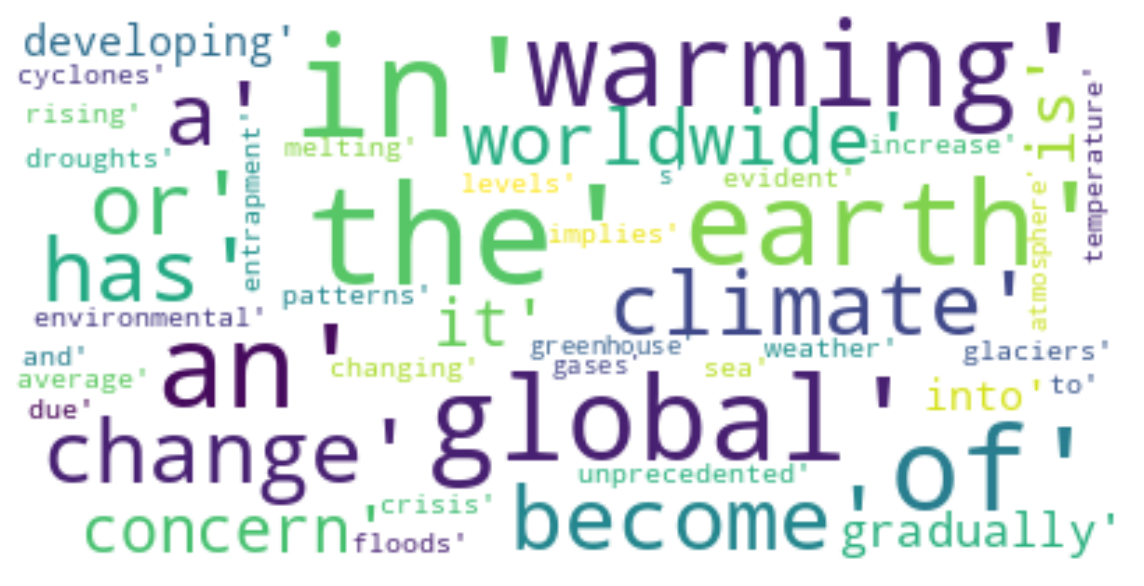

In [49]:
# Without removing stopwords
wordcloud = WordCloud(
                        background_color='white',
                        max_words=100,
                        max_font_size=50, 
                        random_state=42
                        ).generate(str(sentences))
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [50]:
# removing all stopwords and characters that are not a word character
for i in range(len(sentences)):
    sentences[i] = [re.sub(r'\W',' ',word) for word in sentences[i] if word not in stopwords.words('english')]

<Figure size 864x504 with 0 Axes>

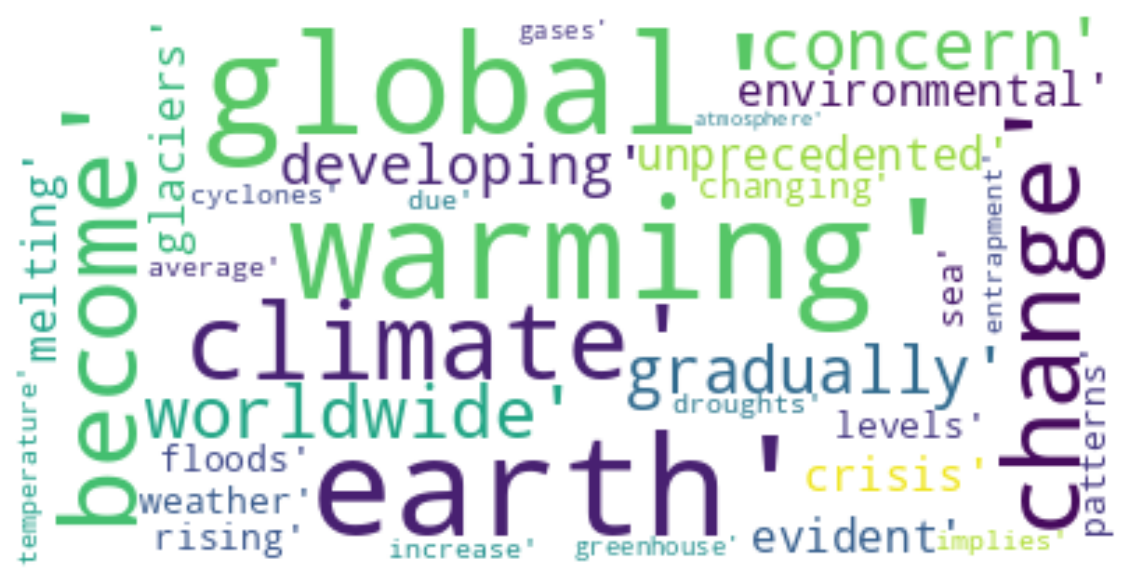

In [51]:
# After removing stopwords
wordcloud = WordCloud(
                        background_color='white',
                        max_words=100,
                        max_font_size=50, 
                        random_state=42
                        ).generate(str(sentences))
fig = plt.figure(1)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()